<a href="https://colab.research.google.com/github/minjeon99/ESAA/blob/Week2/mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 시각화 도구**

## **1. Matplotlib - 기본 그래프 도구**

### **1-1. 선 그래프**
- **선 그래프(line plot)**: 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타냄
  - 시계열 데이터와 같이 연속적인 값의 변화와 패턴 파악하는데 적합

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **기본 사용법**


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/ESAA_dataset/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [50]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


- '전출지별': 누락 데이터(NaN) 많음 -> Excel 파일에서 병합된 셀을 데이터 프레임으로 변환할 때 적절한 값 찾지 못해서 발생한 것
  - **fillna(method='ffill')**: 누락 데이터가 들어 있는 행의 바로 앞 행 데이터 값으로 채움

In [51]:
# 누락값(NaN)을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
# 전입지 열을 df_seoul의 행 인덱스로 지정 -> 전입지 기준 데이터 선택 가능
df_seoul.set_index('전입지', inplace=True)

- rename(): mapper로 딕셔너리 입력 & axis로 0/1 지정해줘야함
  - 또는 index, coulmn으로 지정해주는 방법

In [52]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

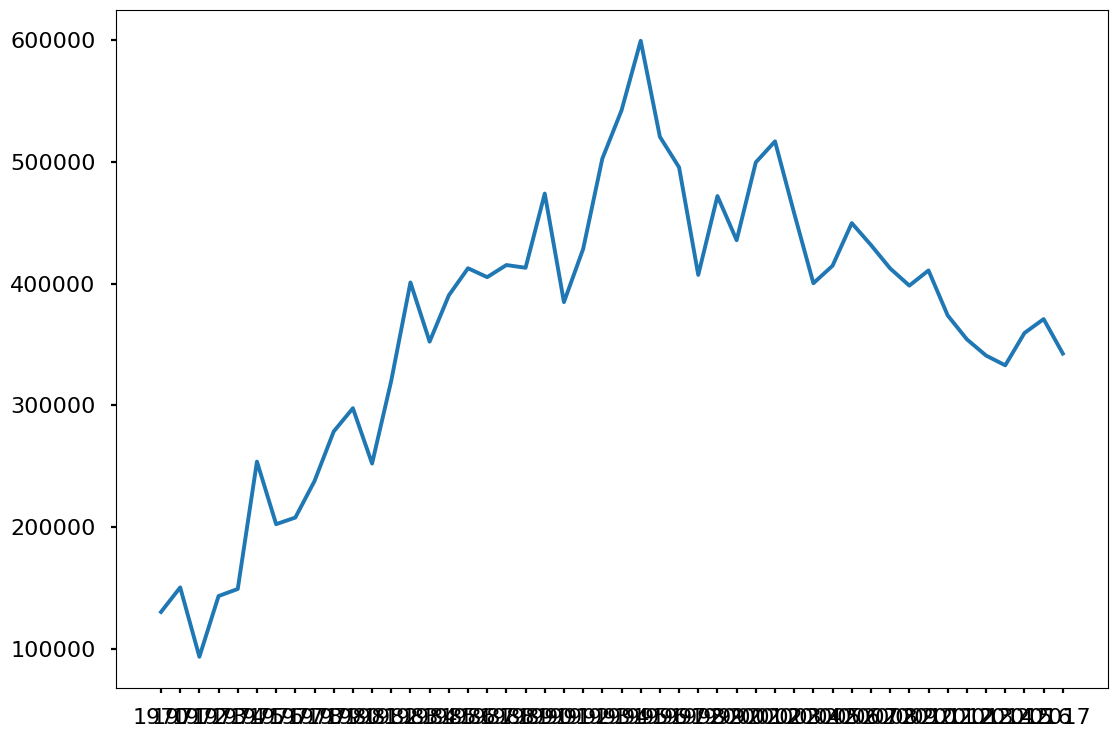

In [53]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

- 시리즈 또는 데이터프레임 객체를 plot()에 직접 입력하는 것도 가능

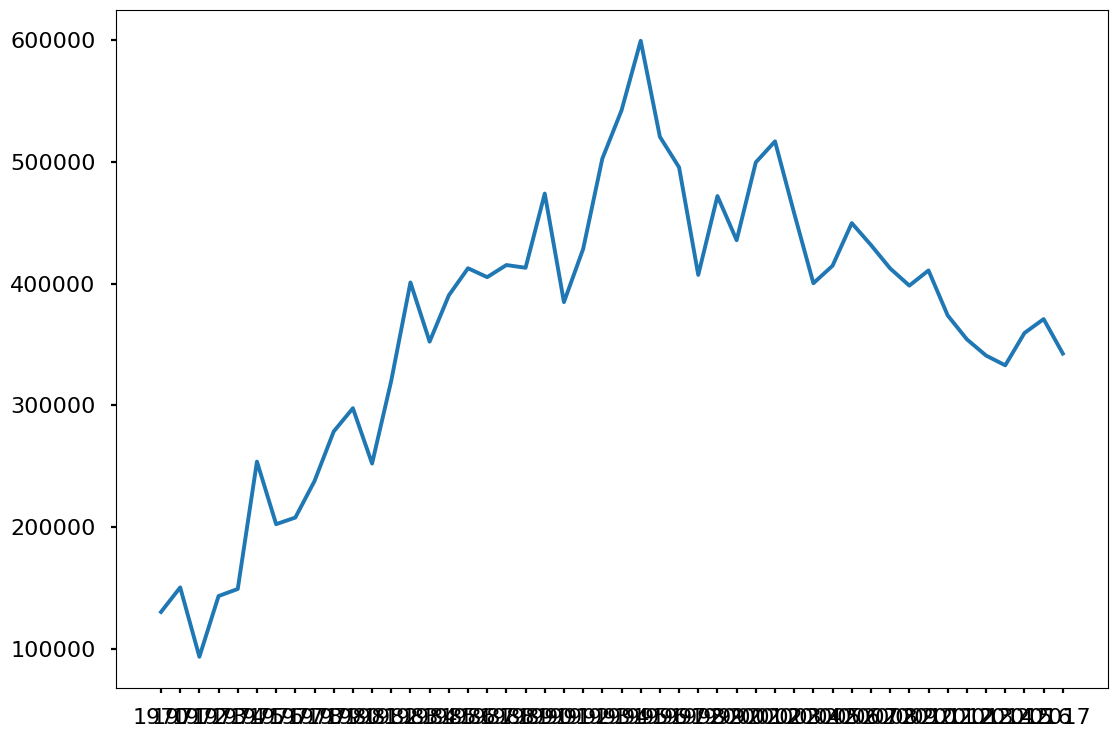

In [54]:
# 판다스 객체를 plot 함수에 입력 -> 동일
plt.plot(sr_one)

#### **차트 제목, 축 이름 추가**
- **title()**: 차트 제목
- **xlabel()**: x축 이름
- **ylabel()**: y축 이름

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

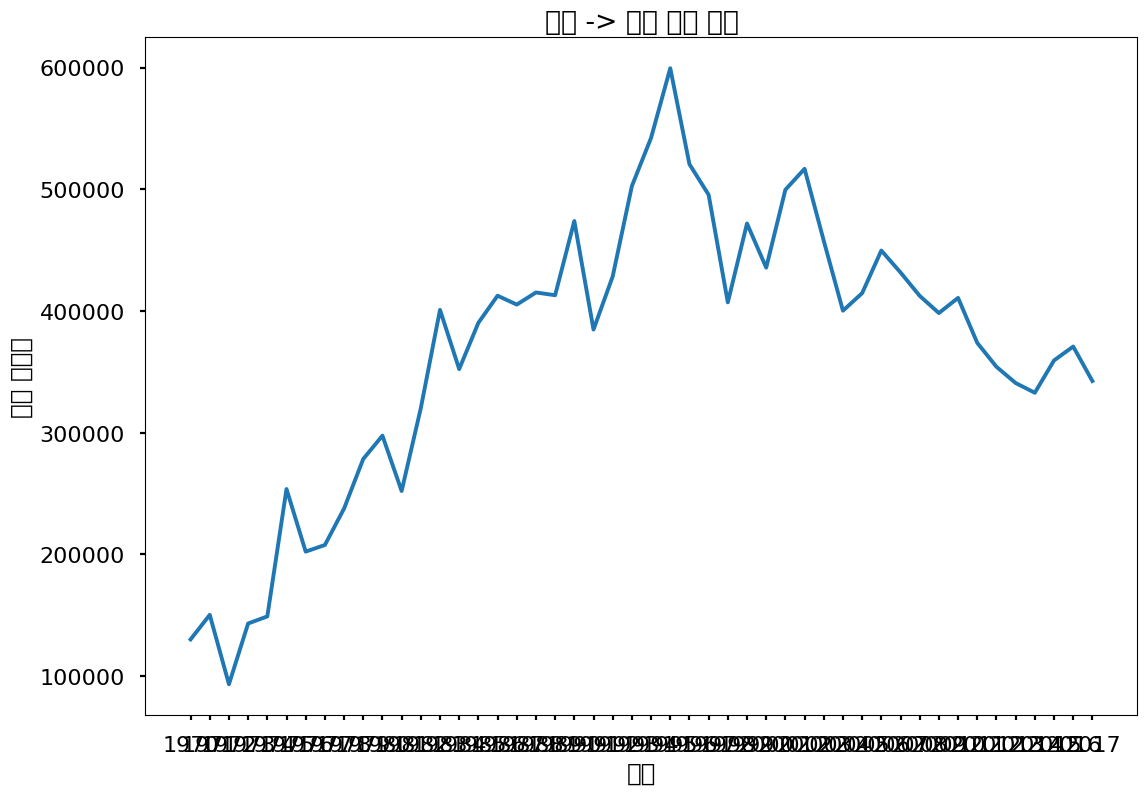

In [55]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

#### **Matplotlib 한글 폰트 오류 해결**

- 교재 코드로 해결되지 않아 다른 코드 사용

In [82]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

- 다시 실행한 결과

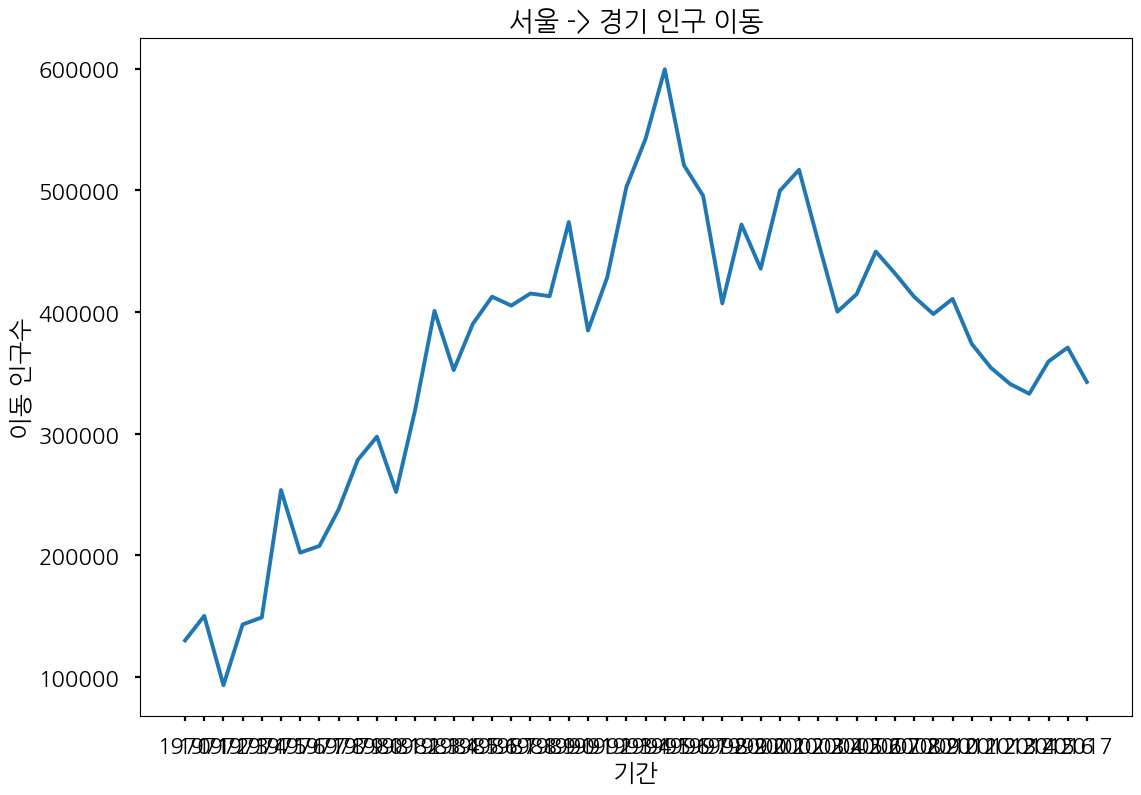

In [57]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

#### **그래프 꾸미기**
- x축 눈금 라벨의 글씨가 겹쳐서 잘 보이지 않는 문제
  1.   **figure()** -> 가로 사이즈 조정
  2.   **xticks()** -> x축 눈금 라벨을 회전
    - rotation='vertical': 반시계방향 90도 회전
    - 각도를 나타내는 숫자도 입력 가능 e.g. `rotation=90`

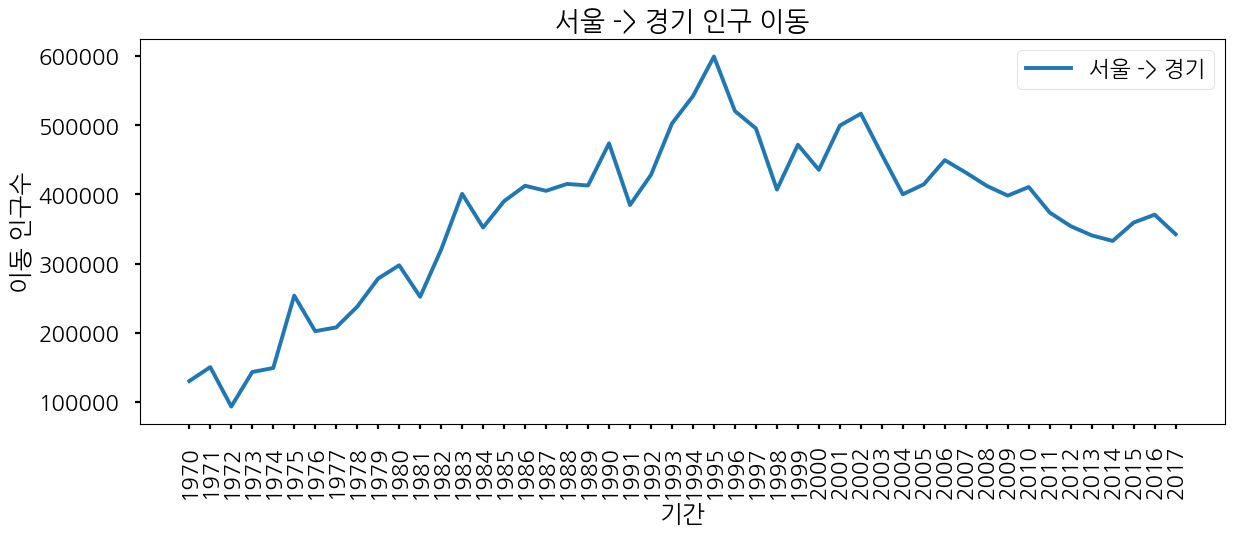

In [58]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간') # x축 이름
plt.ylabel('이동 인구수') # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례 표시

plt.show()

**Matplotlib 스타일 서식 지정**
- 색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 빠르게 일괄 변경

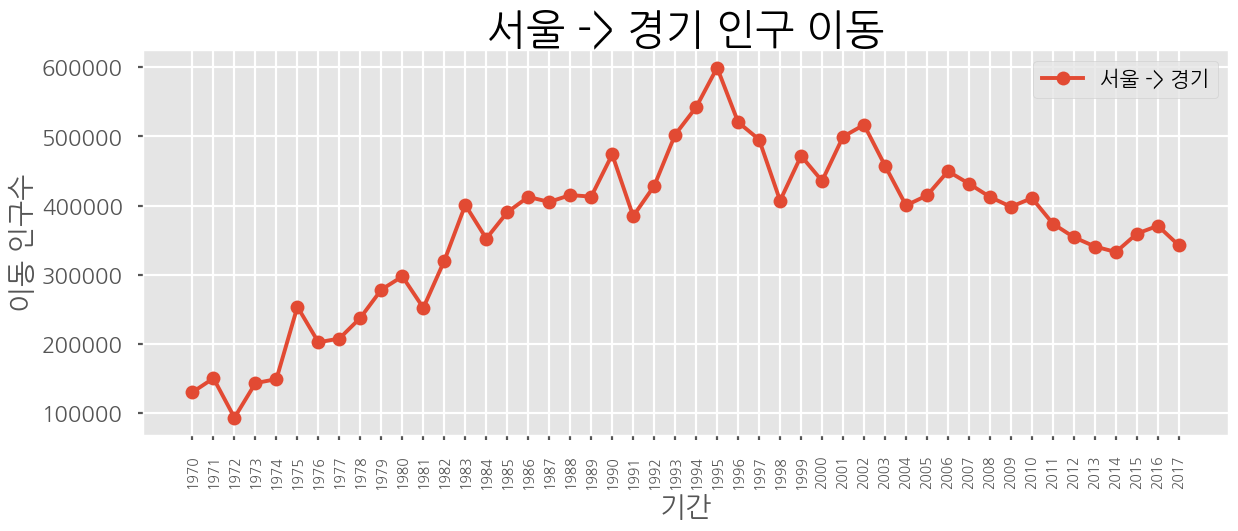

In [59]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # 범례 표시

plt.show()

- **annotate()**: 주석 넣기
  - arrowprops 옵션: 텍스트 대신 화살표 표시

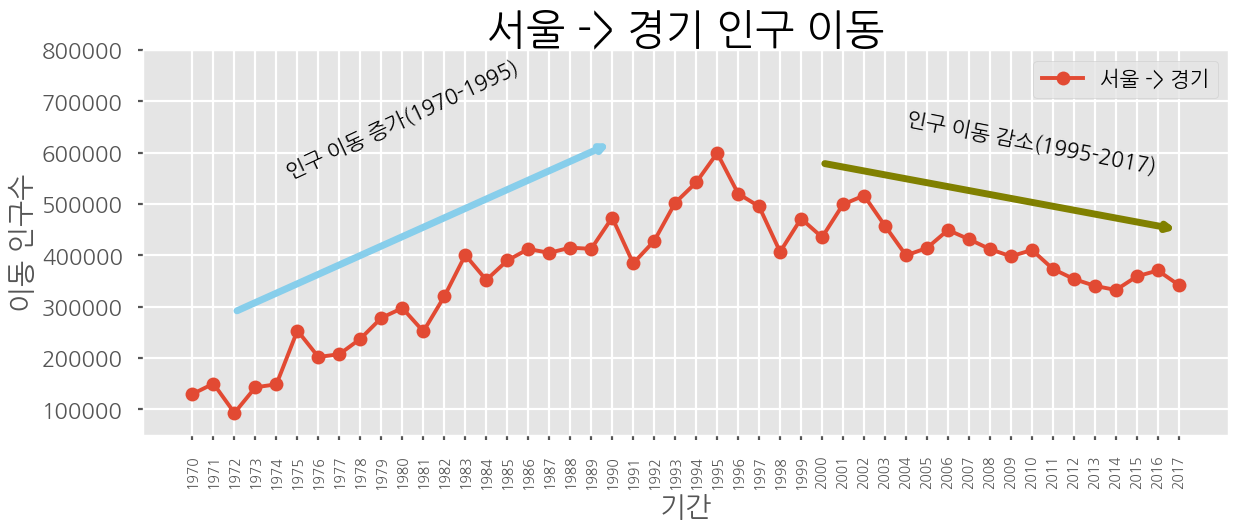

In [60]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # 범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000), # 화살표 머리(끝점)
             xytext=(2,290000), # 화살표의 꼬리(시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 서식
             )

plt.annotate('',
             xy=(47, 450000), # 화살표 머리(끝점)
             xytext=(30,580000), # 화살표의 꼬리(시작점)
             xycoords='data', # 좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5), # 화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
             xy=(10,550000), # 텍스트 위치 기준점
             rotation=25, # 텍스트 회전 각도
             va='baseline', # 텍스트 상하 정렬
             ha='center', # 텍스트 좌우 정렬
             fontsize=15 # 텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
             xy=(40,560000), # 텍스트 위치 기준점
             rotation=-11, # 텍스트 회전 각도
             va='baseline', # 텍스트 상하 정렬
             ha='center', # 텍스트 좌우 정렬
             fontsize=15 # 텍스트 크기
             )

plt.show()

#### **화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용**
- 여러 개의 axe 객체 생성 -> 분할된 화면마다 axe 객체를 하나씩 배정
- axe 객체는 각각 서로 다른 그래프 표현할 수 있음

  => 한 화면에서 여러 그래프 비교/다양한 정보를 동시에 보여줄 때 사용
- **figure()** 함수: 그래프를 그리는 그림틀(fig) 생성
- **figsize** 욥션: (가로, 세로) 그림틀 크기 설정
- **add_subplot()** 메소드: 그림틀 여러 개로 분할 -> 각 부분을 axe 객체라고 부름


<ipython-input-61-f0db57cd412e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-61-f0db57cd412e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


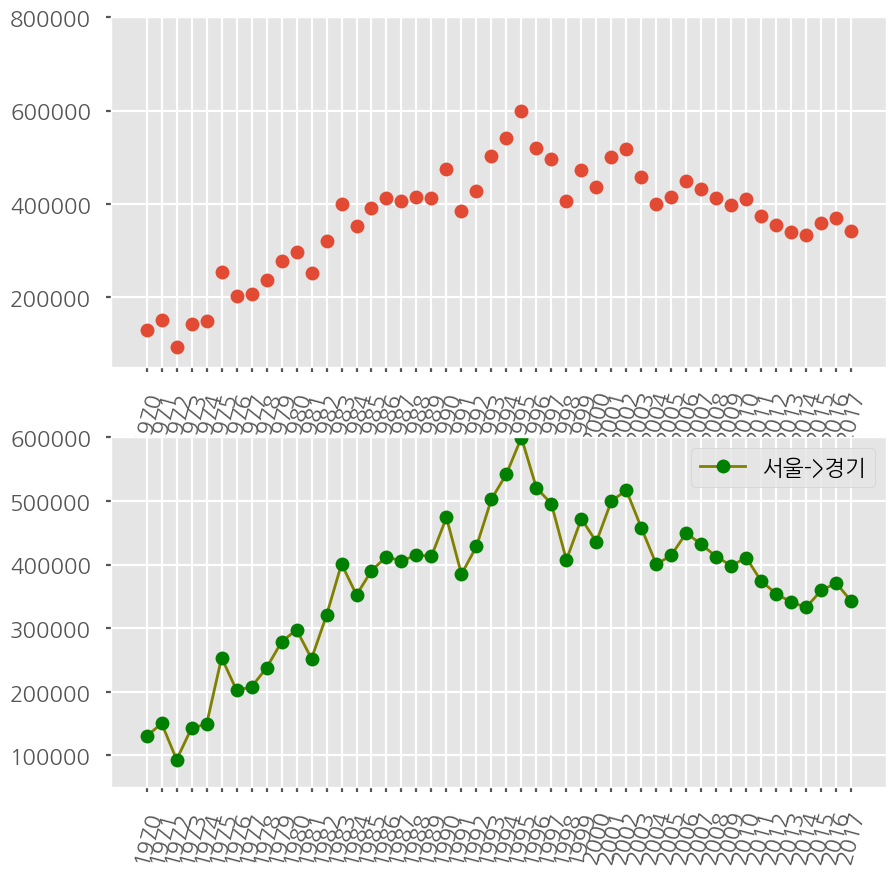

In [61]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정(최소, 최대)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,600000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

- 각 axe 객체에 plot() 메소드 적용하여 그래프 출력
- **set_xticklabels()** 메소드: 글자 반시계 방향으로 #도 회전

- `'o'`: 선 그래프가 아니라 점 그래프로 표현
- `marker='o'`: 마커 모양(e.g. 'o', '+', '*', '.'
- `markerfacecolor='green'`: 마커 배경색
- `markersize=10`: 마커 크기
- `color='olive'`: 선의 색
- `linewidth=2`: 선의 두께
- `label='서울->경기'`: 라벨 지정

<ipython-input-62-1ac2d39ec772>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


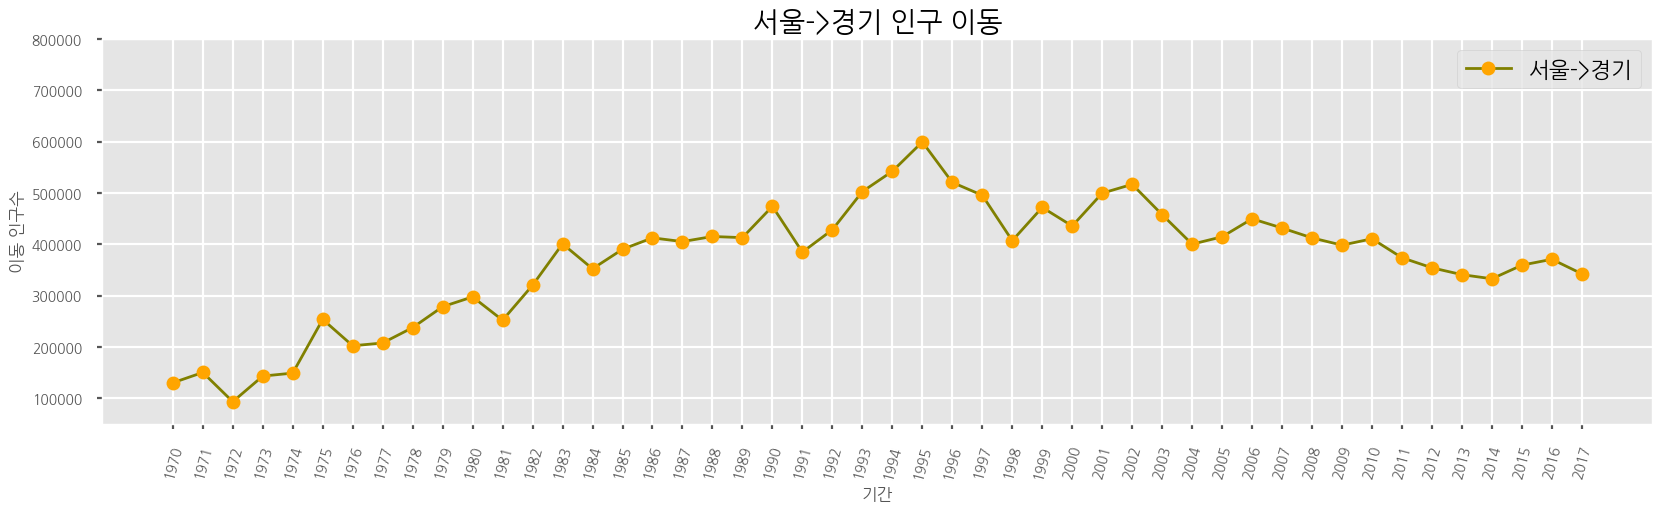

In [62]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1) # axe 객체 1개 생성

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울->경기')
ax.legend(loc='best')

# y축 범위 지정(최소, 최대)
ax.set_ylim(50000,800000)

# 차트 제목 추가
ax.set_title('서울->경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

**동일한 그림(axe 객체)에 여러 개의 그래프 추가**
- 동일한 axe 객체(ax)에 plot() 메소드 여러 번 적용

<ipython-input-63-b484f07c0851>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


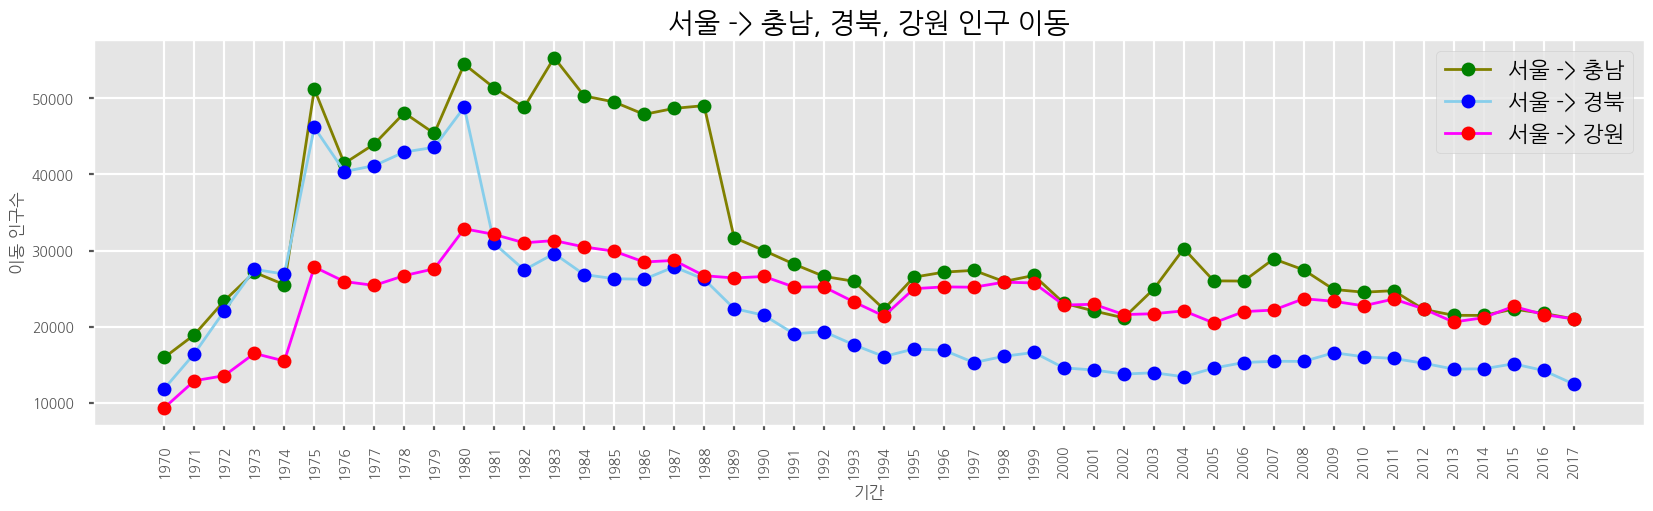

In [63]:
# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

**4개 그래프 그리기**
- 4개의 axe 객체 생성 -> 각 지역에 해당하는 4개의 행 선택 -> axe 객체에 하나씩 plot() 메소드 적용

<ipython-input-64-9efbc7287e7e>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-64-9efbc7287e7e>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-64-9efbc7287e7e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-64-9efbc7287e7e>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


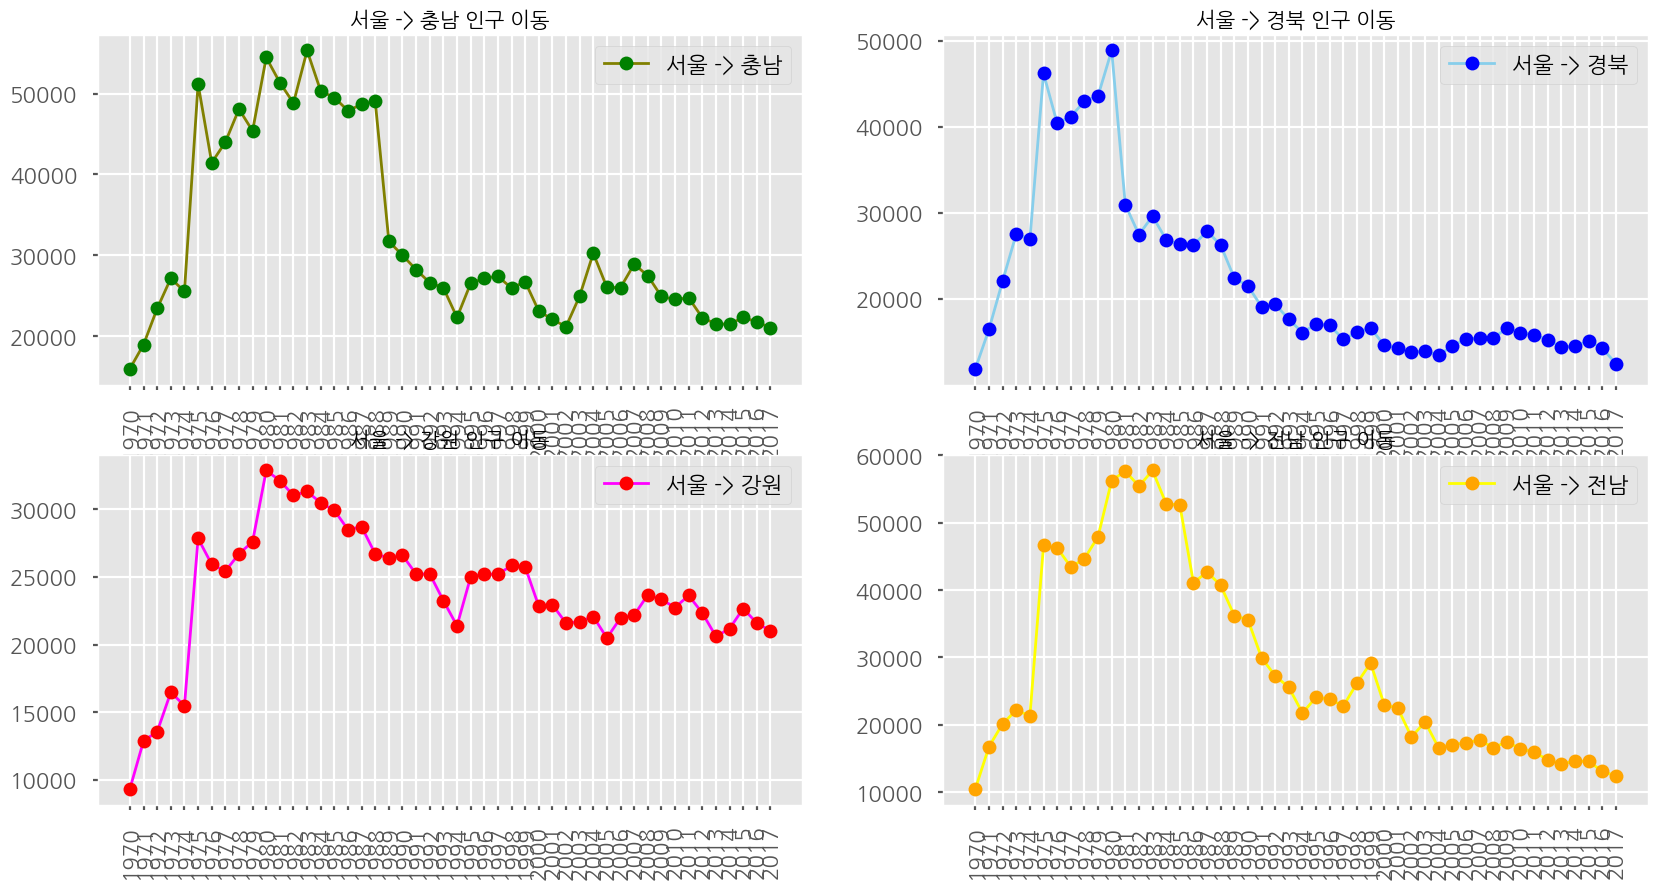

In [64]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()  # 변경사항 저장하고 그래프 출력

**Matplotlib에서 사용할 수 있는 색의 종류**

In [65]:
# 라이브러리 불러오기
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors={}

# 컬러 이름과 헥사코드 확인하여 딕셔서리에 입력
for name, hex in matplotlib.colors.cnames.items():
	colors[name] = hex

# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### **1-2. 면적 그래프**
- **면적 그래프(area plot)**: `plot(kind='area')`
  - 각 열의 데이터를 선 그래프로 구현
  - 선 그래프와 x축 사이의 공간에 색이 입혀짐
  - 투명도(alpha): default=0.5
  - 누적 여부: default = `stacked=True`
    
    -> 누적 선 그래프(stacked line plot)라고 부르기도 함

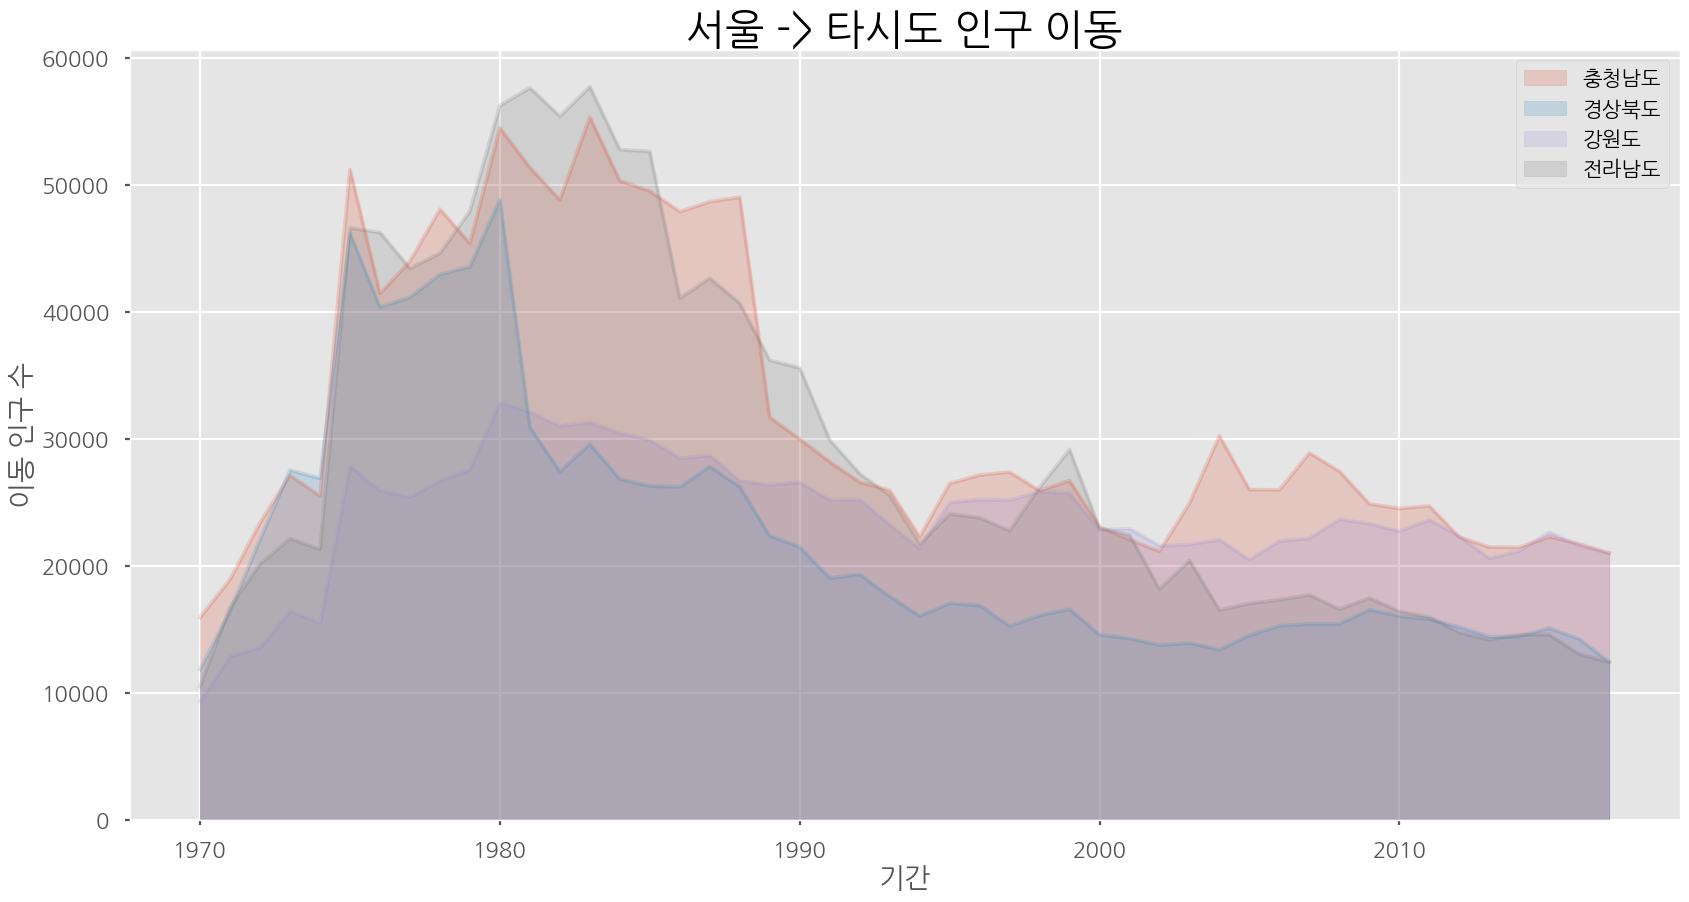

In [66]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

**선 그래프들이 서로 겹치지 않고 위 아래로 누적되는 면적 그래프**

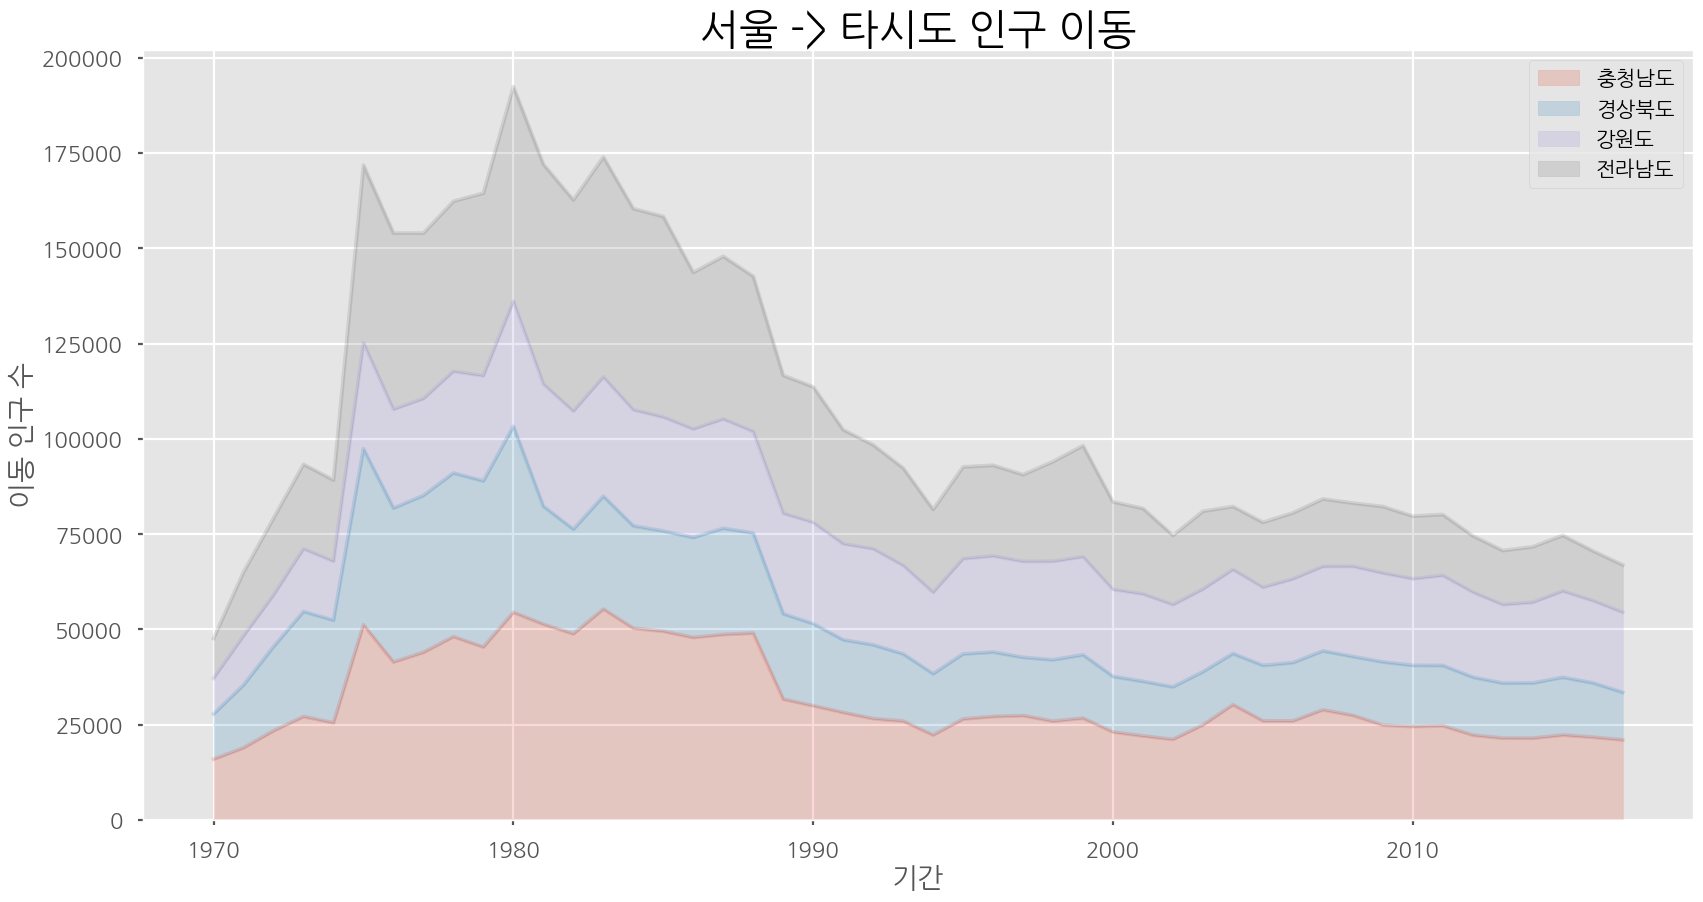

In [67]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._axes.Axes'>


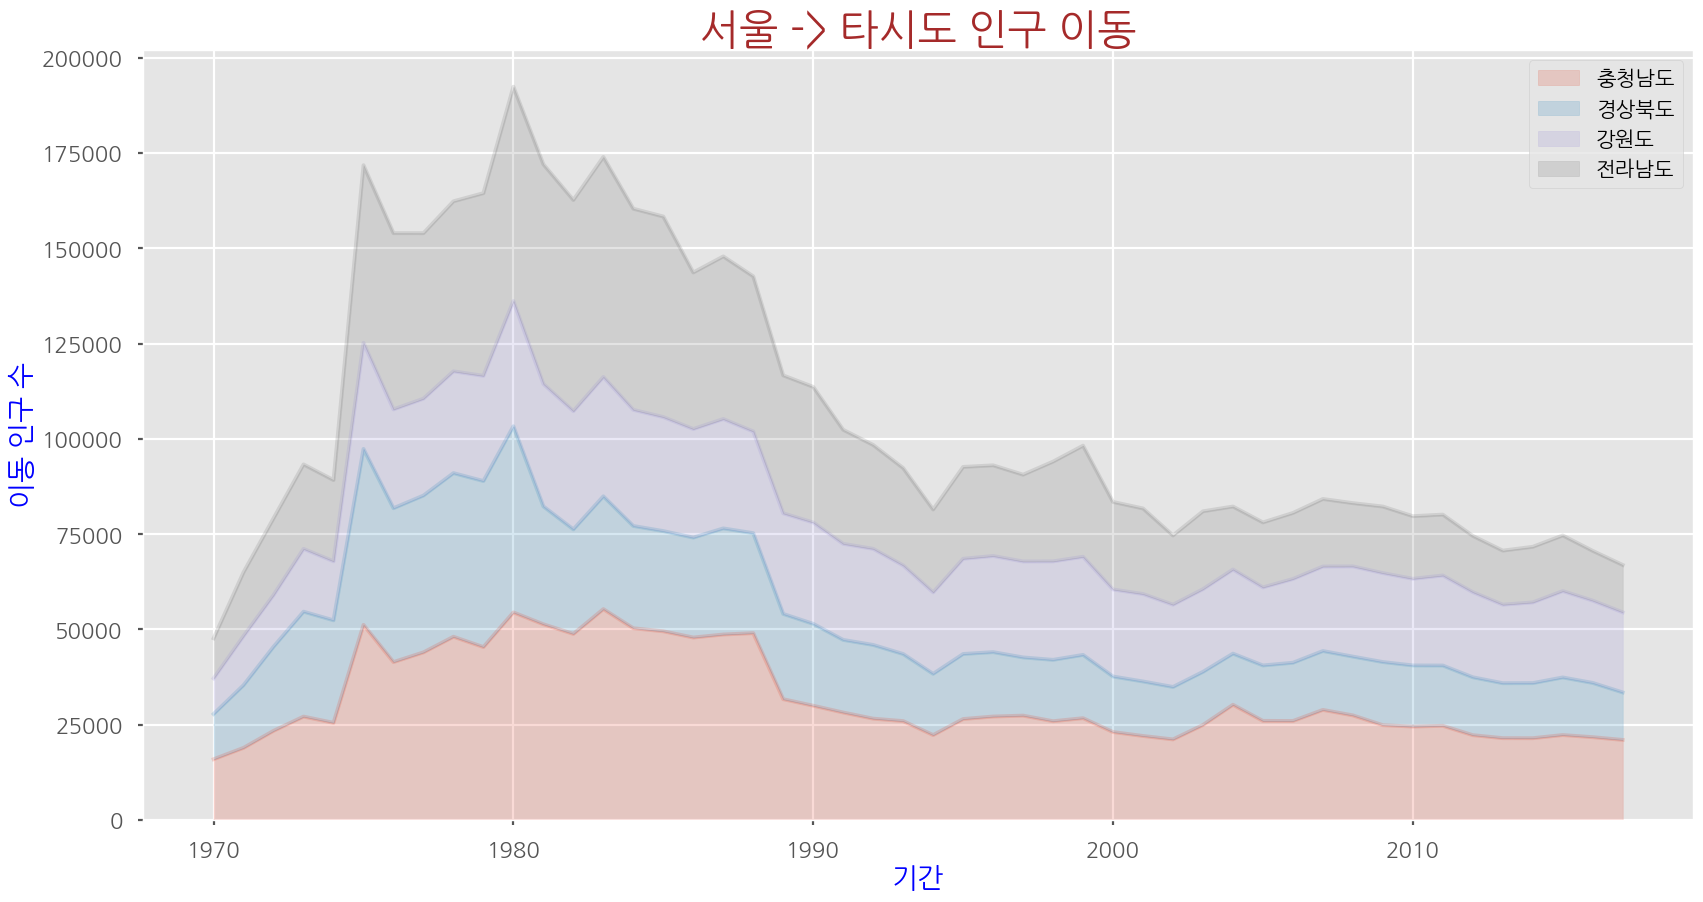

In [68]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### **1-3. 막대 그래프**
- **막대 그래프(bar plot)**: 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현

  -> 막대의 상대적 길이 차이를 통해 값의 크고 작음을 설명
- **세로형** 막대 그래프: `plot(kind='bar)`
  - 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명

   => **시계열 데이터** 표현에 적합
- **가로형** 막대 그래프: `plot(kind='barh)`
  - 변수 사이의 값의 크기 차이 설명에 적합

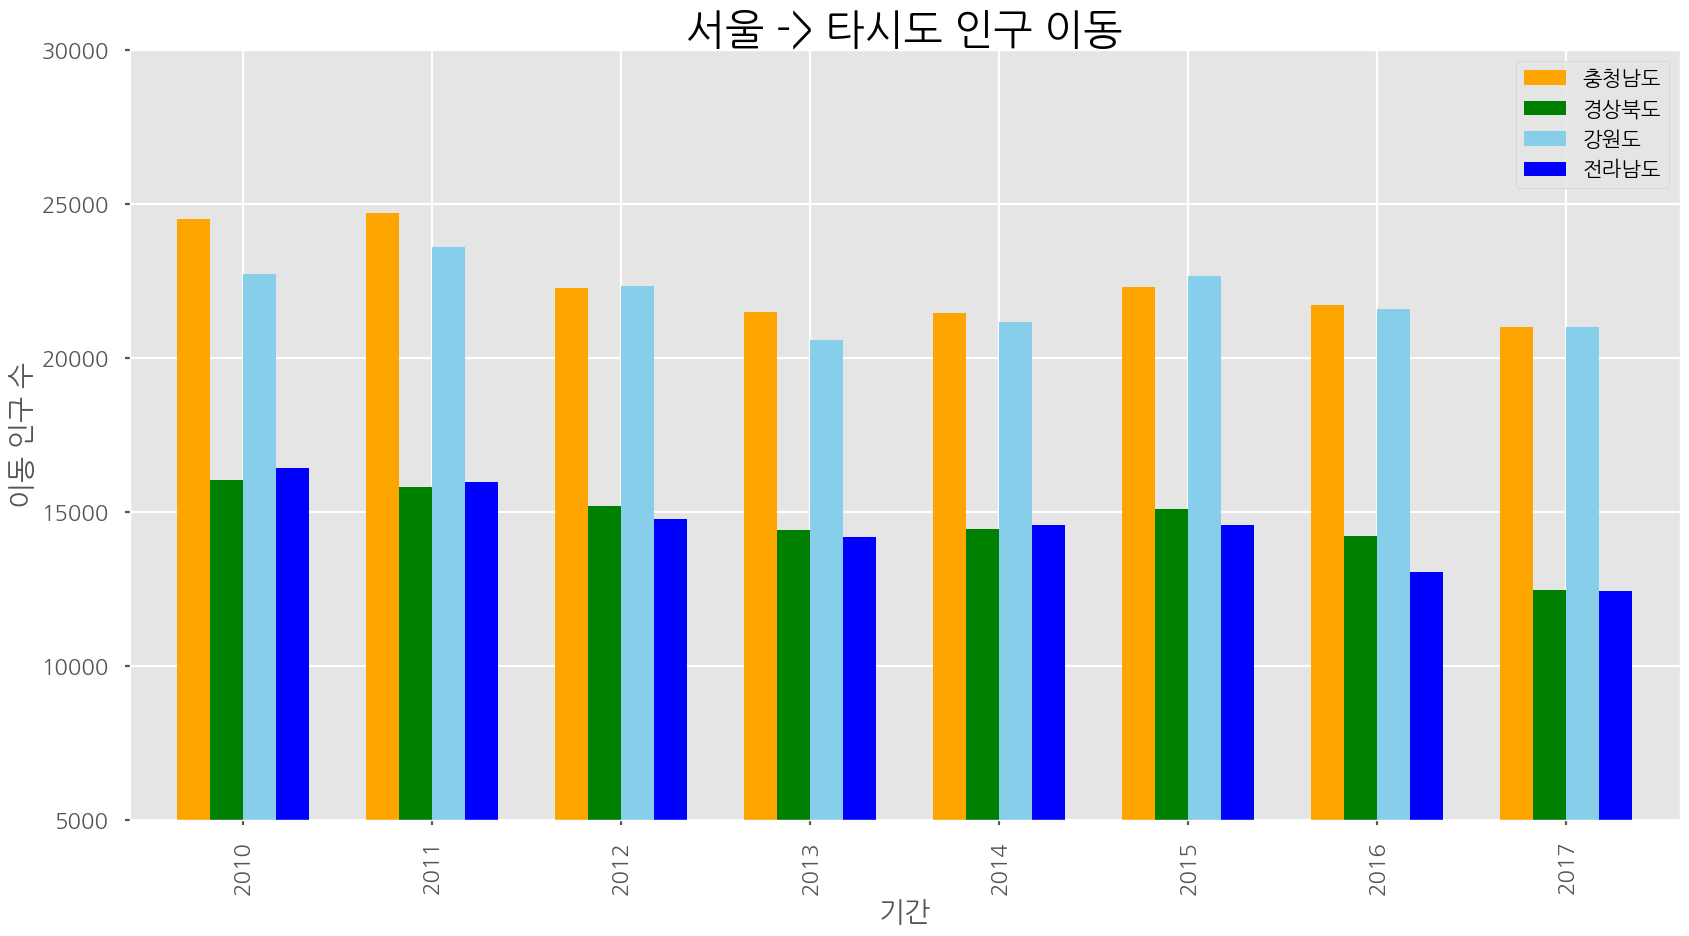

In [69]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

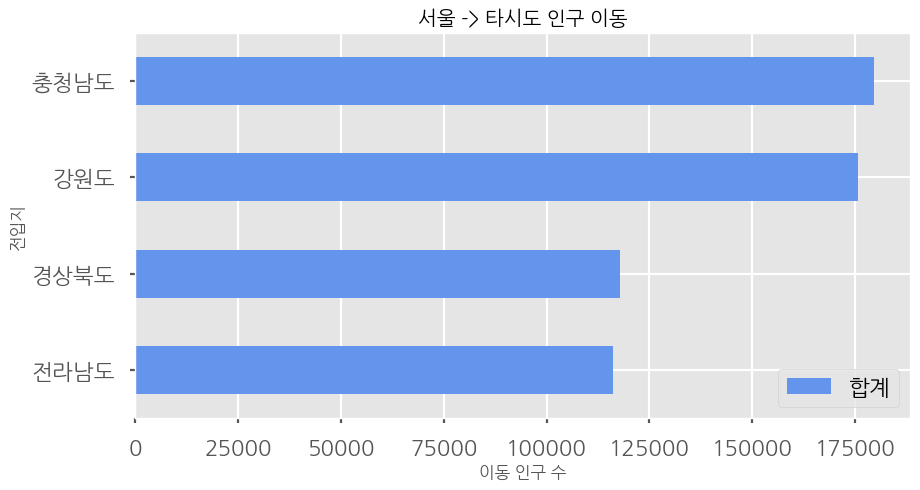

In [70]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

**보조 축 활용(2축 그래프)**
-

<ipython-input-71-6bb9f790090c>:5: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('/content/drive/MyDrive/ESAA_dataset/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


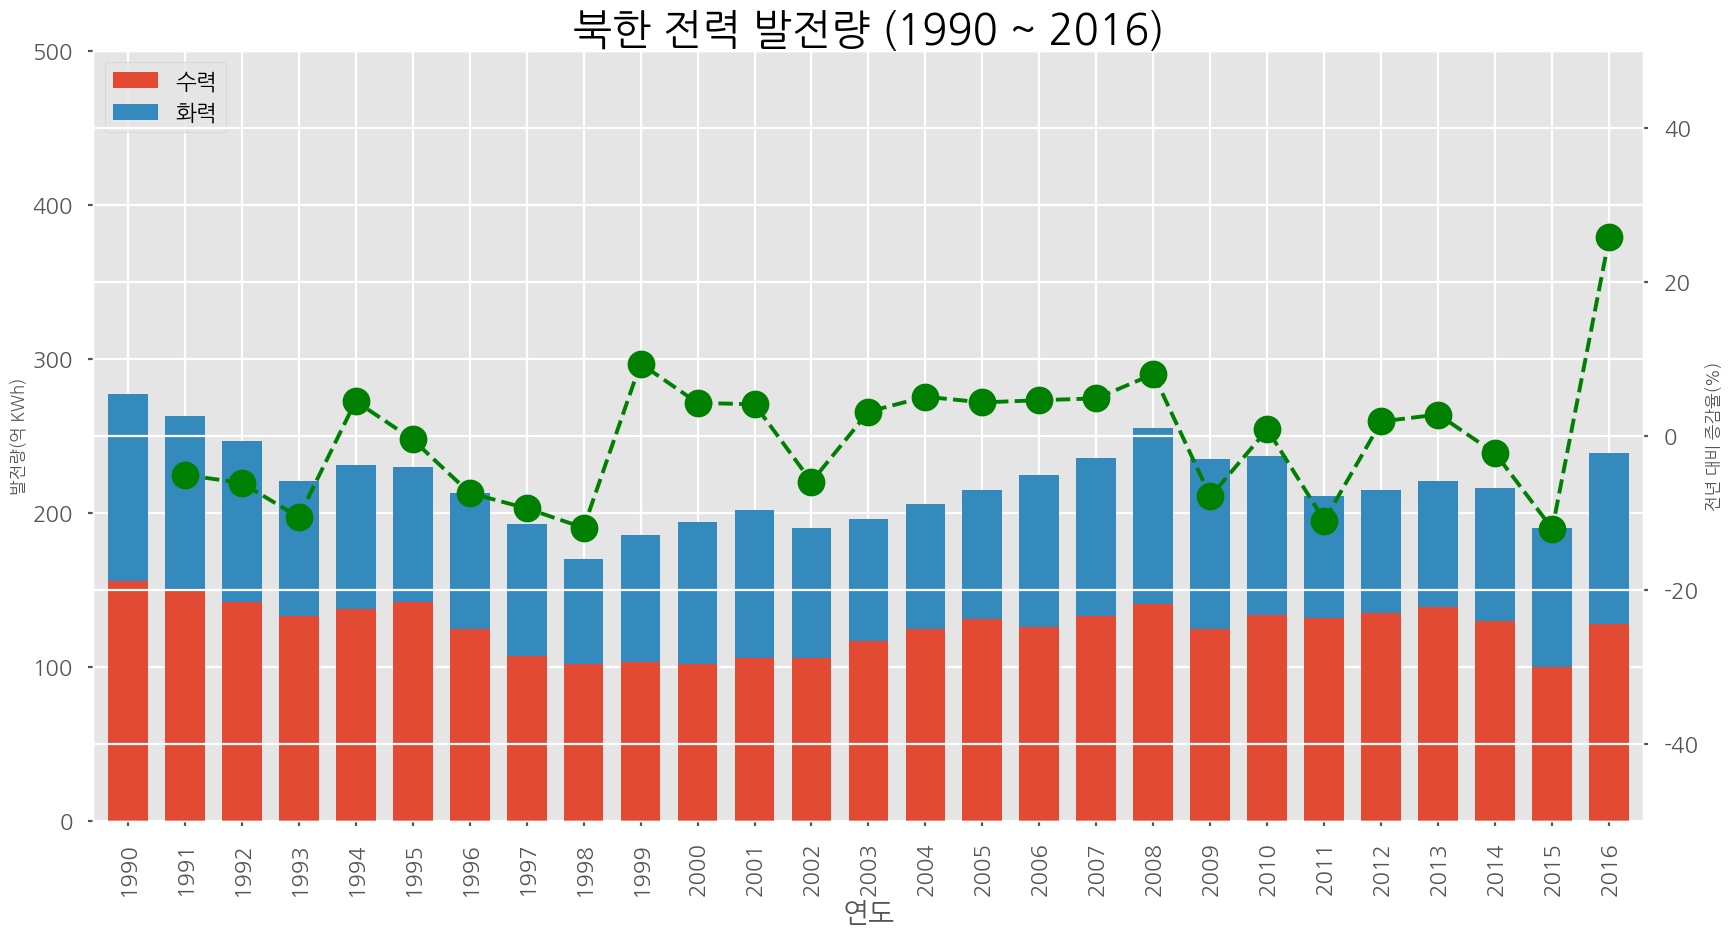

In [71]:
plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel('/content/drive/MyDrive/ESAA_dataset/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20,
         color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

### **1-4. 히스토그램**
- **히스토그램(histogram)**: 단변수 데이터의 빈도수를 그래프로 표현
  - x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시

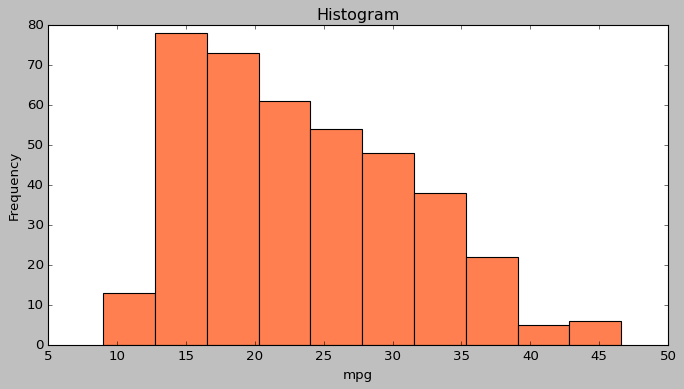

In [72]:
plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### **1-5. 산점도**
- **산점도(scatter plot)**: `plot(kind='scatter')`
  - 서로 다른 두 연속 변수 사이의 관계 (일반적으로 정수형/실수형)
  - 2개의 연속 변수를 각각 x축, y축에 하나씩 놓고, 데이터 값이 위치하는 (x,y) 좌표를 찾아서 점으로 표시

- 두 연속 변수의 관계를 보여준다는 점에서 선 그래프와 유사
- 선 그래프에서 `plot(x,y,'o')` -> 점으로 표현
  
  = 사실상 산점도

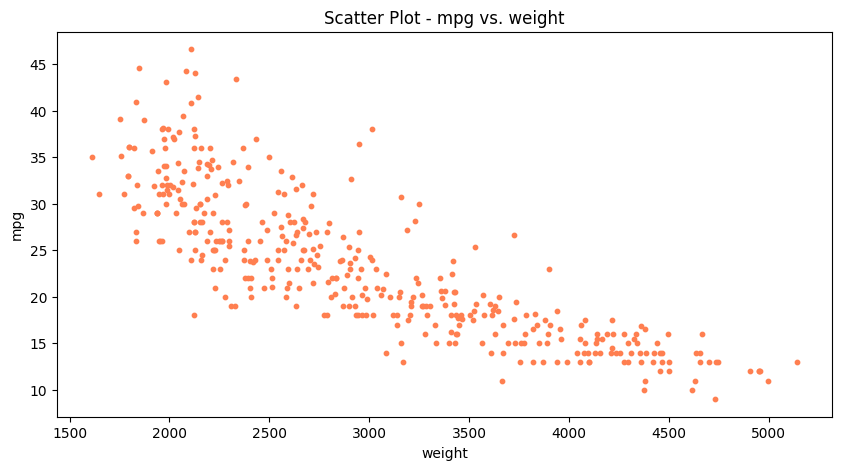

In [73]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

**3개의 변수 사이의 관계**
- 점의 크기 또는 색상으로 표현
  - 버블(bubble) 차트: 점의 크기에 변화를 준 그래프

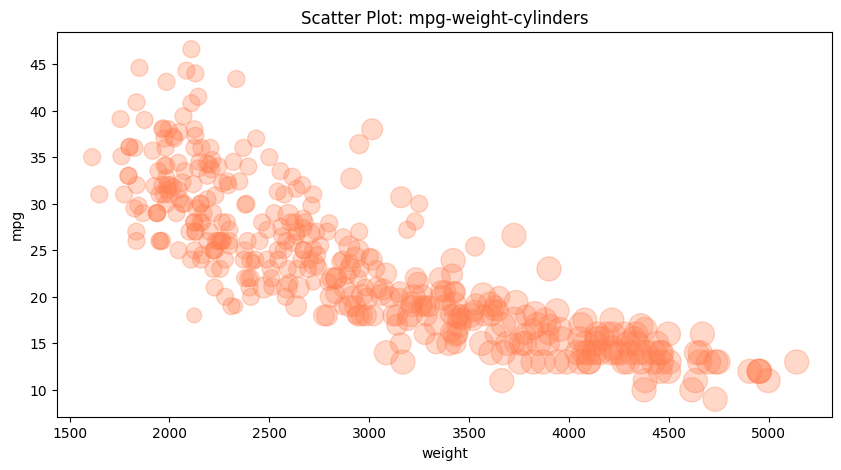

In [74]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

**그래프를 그림 파일로 저장**
- `savefig()` 함수에 저장할 파일의 이름과 경로 설정
  - `transparent=True`: 배경 투명 설정

<function matplotlib.pyplot.show(close=None, block=None)>

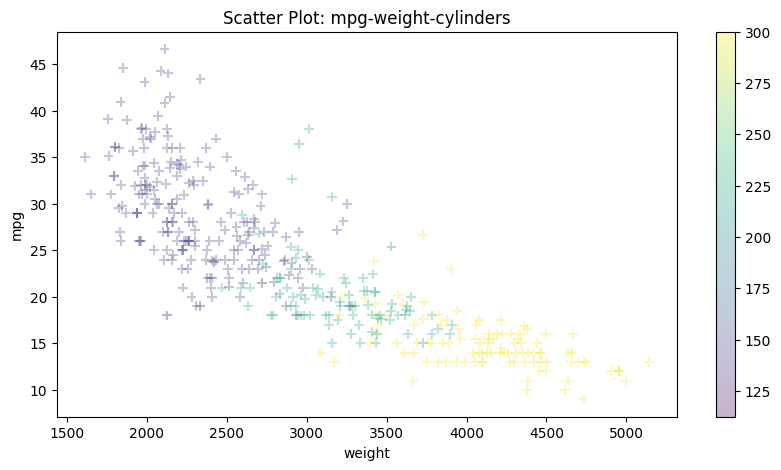

In [75]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10,5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)

plt.show

### **1-6. 파이 차트**
- **파이 차트(pie chart)**: `plot(kind='pie')`
  - 원을 파이 조각처럼 나누어서 표현
  - 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례
  - `autopct`: 부채꼴 안에 들어갈 숫자 형식 지정

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


<ipython-input-76-7dd0d565d4e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산


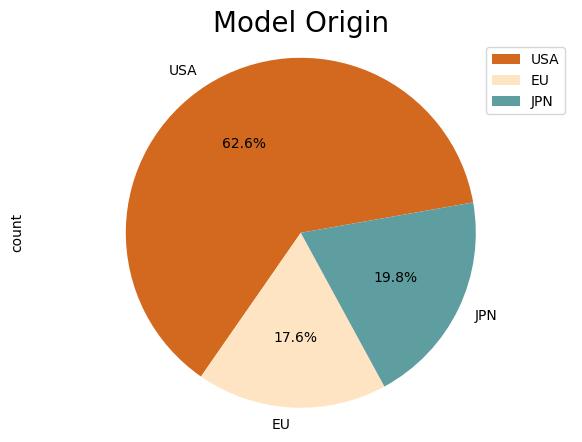

In [76]:
# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head()) # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%', # 퍼센트 % 표시
                        startangle=10, # 파이 조각 나누는 시작점(각도)
                        colors=['chocolate', 'bisque', 'cadetblue'] # 색상 리스트
                        )

plt.title('Model Origin', size=20)
plt.axis('equal') # 파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right') # 범례 표시
plt.show()

### **1-7. 박스 플롯**
- 박스 플롯(boxplot): `boxplot()`
  - 범주형 데이터 분포 파악에 적합
  - 5개의 통계 지표 - 최소값, 1분위값, 중간값, 3분위값, 최대값 - 제공
  
      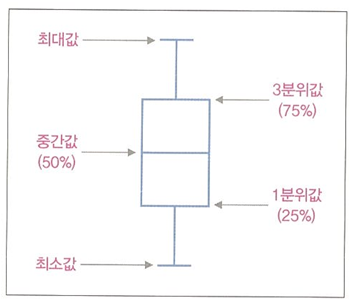

<ipython-input-83-553a634681ae>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster') # 스타일 서식 지정


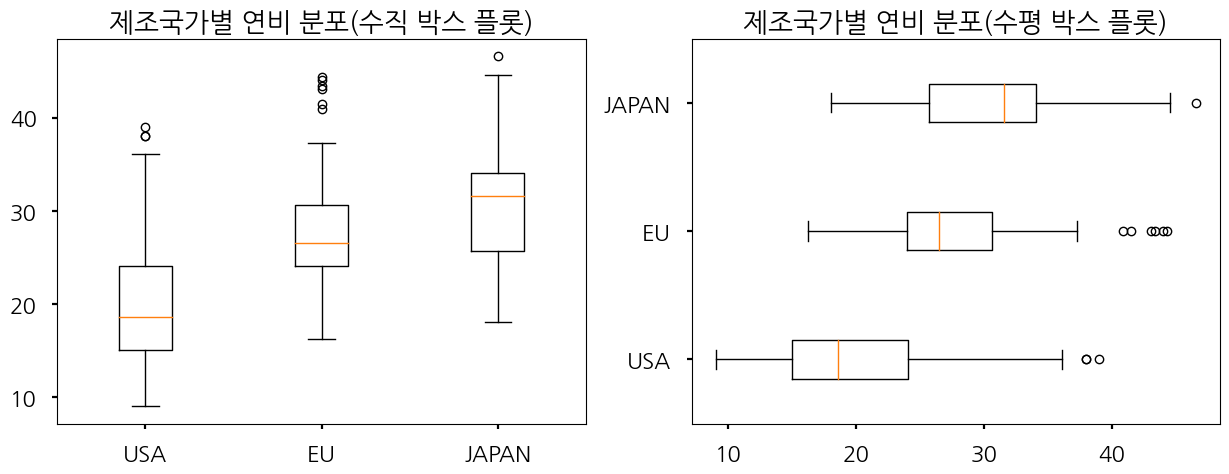

In [83]:
plt.style.use('seaborn-poster') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/auto-mpg.csv')

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

- **x**
  - 'origin' 값이 1,2,3인 'mpg' 열의 데이터 분포 출력
  - 박스 플롯에 넣을 열 3개를 리스트에 담아 x 옵션에 할당
- **labels**: 각 열을 나타내는 라벨 정의
- `vert=False`: 수평 박스 플롯